# Explore here

In [112]:
import pandas as pd
import urllib.request
import ssl

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# escalado
from sklearn.preprocessing import StandardScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#modelar
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, recall_score
from sklearn.metrics import roc_auc_score, roc_curve


In [113]:
#Guardamos en raw para poderlo leer:

from ssl import _create_unverified_context

url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"

ssl_context = urllib.request.urlopen(url, context=ssl._create_unverified_context())
df=pd.read_csv(ssl_context, index_col=None, delimiter=",")

df.to_csv ("/Users/nataliagarciavila/Desktop/4 GEEKS ACADEMY/CLASES_EJERCICIOS_/CLASES_EJERCICIOS_/EJERCICIOS/EJERCICIOS CLASE 17-18:: MACHINE LEARNING/CLASE EJERCICIOS 18/machine-learning-python-template/data/raw/data/data.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [114]:
#Conocer las dimensiones y tipologías de datos del objeto con el que estamos trabajando es vital

df.shape

(768, 9)

In [115]:
# Obtener información sobre tipos de datos y valores no nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

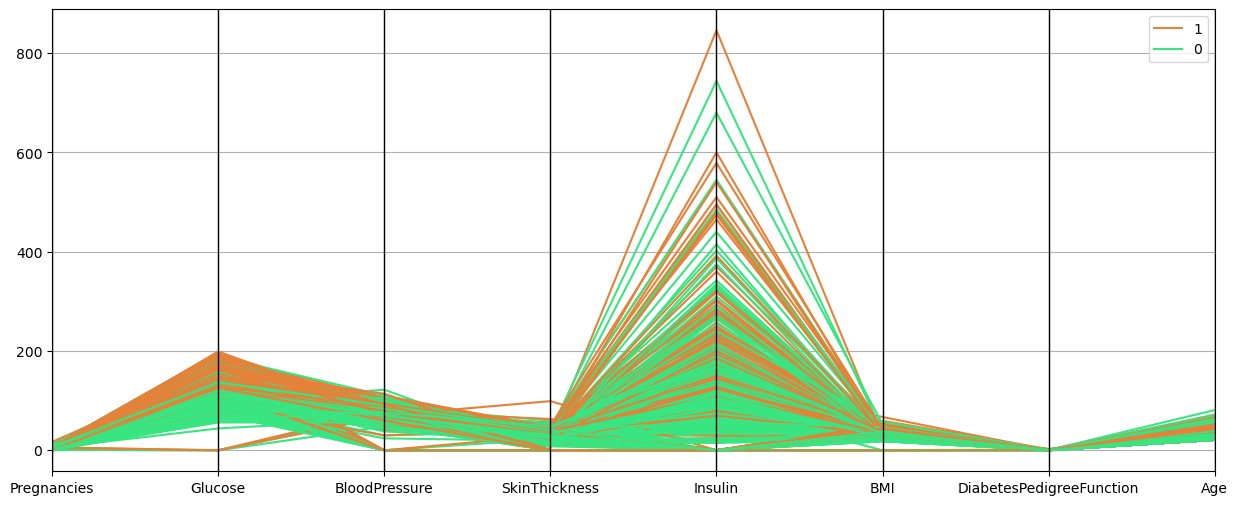

In [116]:
plt.figure(figsize=(15, 6))

pd.plotting.parallel_coordinates(df, "Outcome", color = ("#E58139", "#39E581"))

In [117]:
#Utilizamos el método 'isna' para conocer cuántos valores nulos hay por columna:

total_nans = df.isna().sum()
total_nans

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [118]:
#Usamos el método duplicated() para detectar duplicados en un DataFrame y sum() para contar el número de duplicados.

duplicados = df.duplicated()
num_duplicados = duplicados.sum()
duplicados

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

En este caso como todos los datos son relevantes para la campaña de marketing,no consideramos el hecho de eliminar ningún dato.

In [119]:
# Creamos una lista de arrays con las columnas indicadas:
columns_to_filter = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age','Outcome']
   
# Eliminamos las filas donde cualquier columna en 'columnas_a_filtrar' tiene el valor 'unknown':

for columna in columns_to_filter:
    df = df[df[columna] != 'unknown']

print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

Text(0, 0.5, 'Frequency')

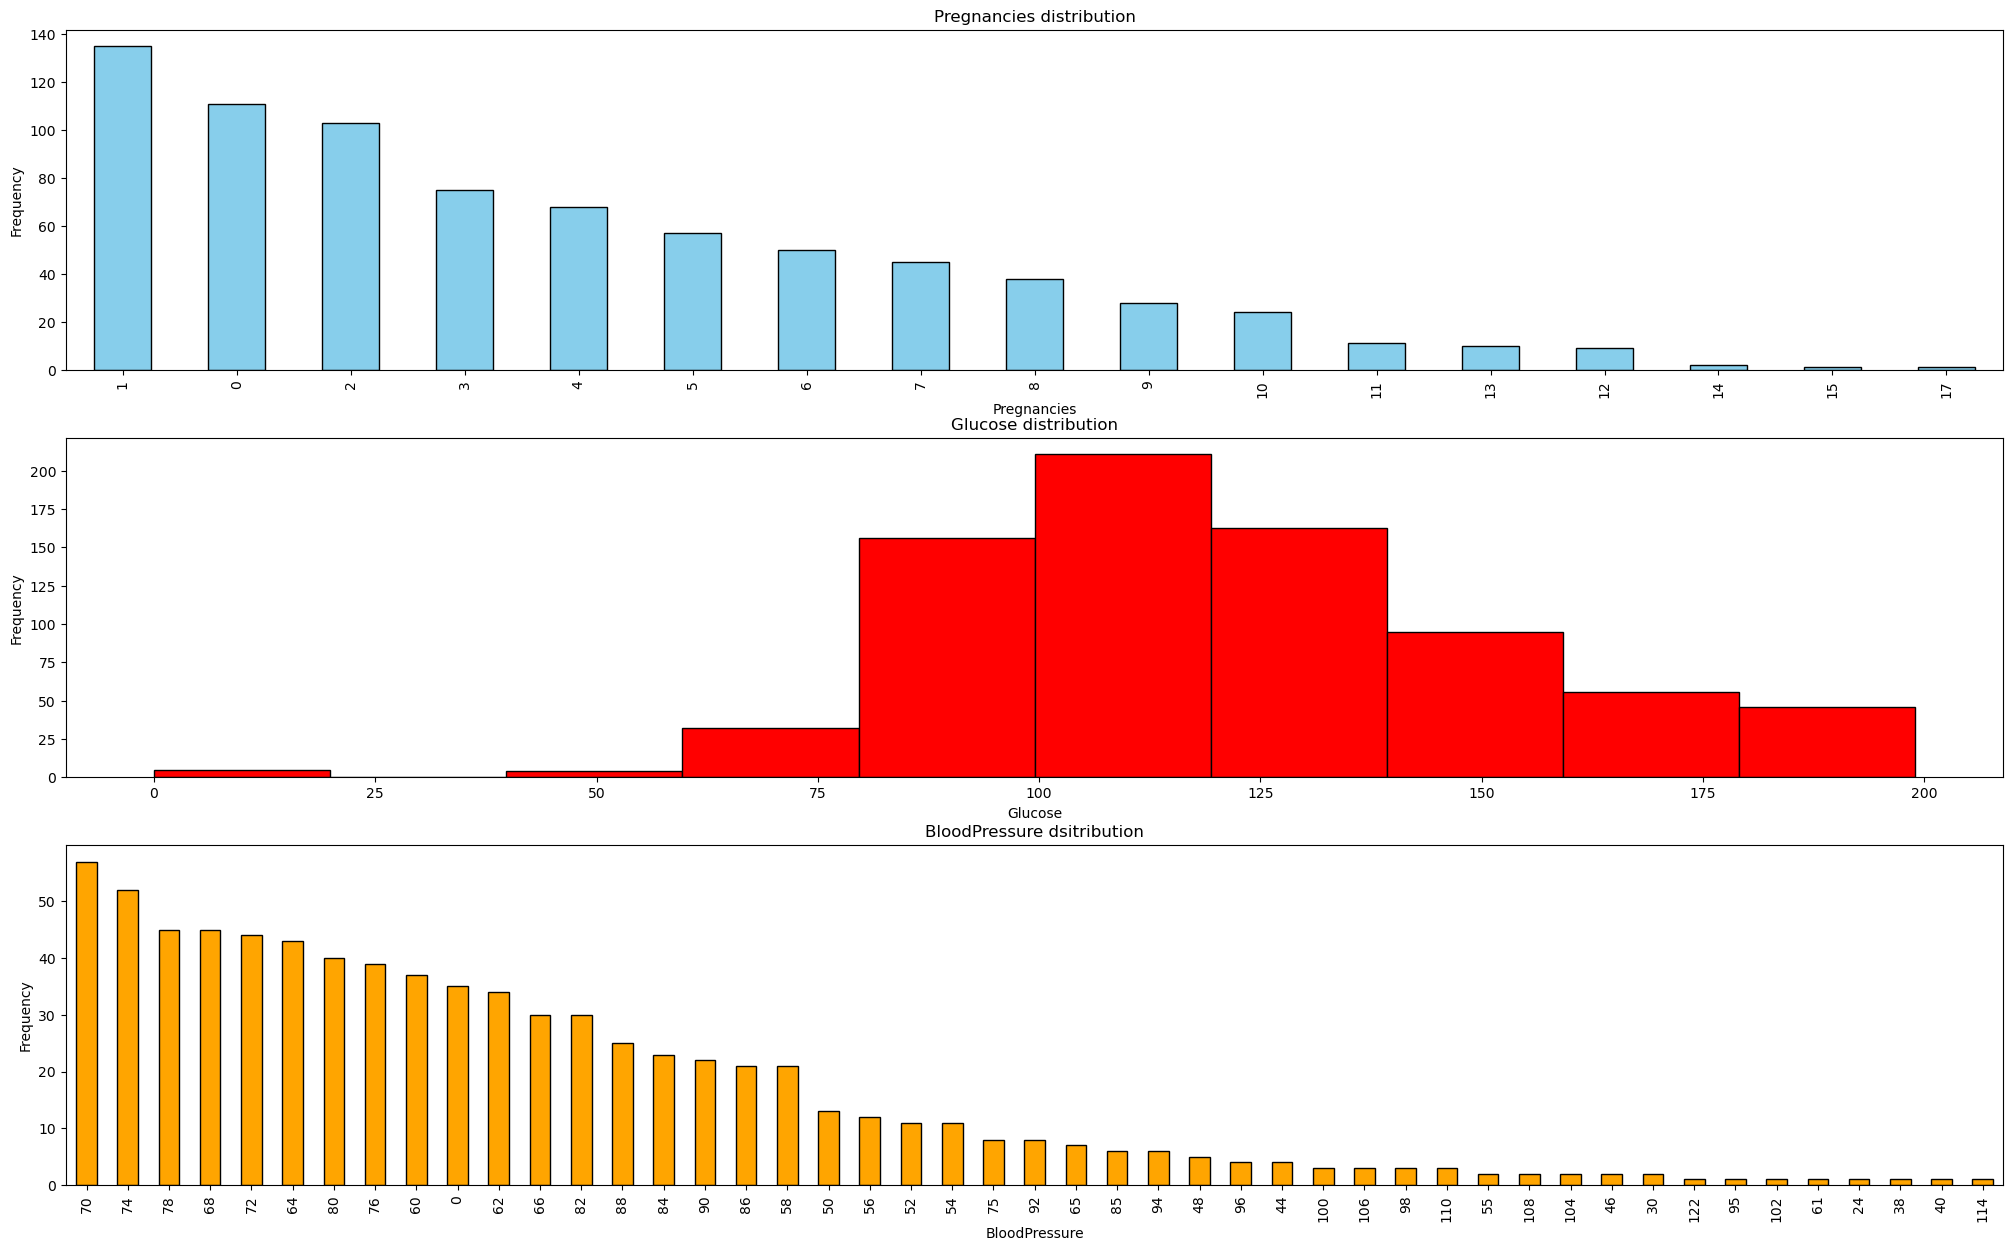

In [120]:

# Vamos a definir las variantes numéricas ya que no tenemos variantes categóricas.

fig, axes = plt.subplots(3,1,figsize=(25,15))

# Bar plot para "Pregnancies"
df["Pregnancies"].value_counts().plot(kind= "bar", ax=axes[0], color="skyblue", edgecolor="k")

axes[0].set_title('Pregnancies distribution')
axes[0].set_xlabel('Pregnancies')
axes[0].set_ylabel('Frequency')

# Histograma para "Glucose"
df["Glucose"].plot(kind="hist", ax=axes[1], color="red", edgecolor="k")

axes[1].set_title('Glucose distribution')
axes[1].set_xlabel('Glucose')
axes[1].set_ylabel('Frequency')

# Bar plot para "BloodPressure"
df["BloodPressure"].value_counts().plot(kind= "bar", ax=axes[2], color="orange", edgecolor="k")

axes[2].set_title('BloodPressure dsitribution')
axes[2].set_xlabel('BloodPressure')
axes[2].set_ylabel('Frequency')


En estas gráficas podemos observar los siguientes resultados:

- Pregnancies: Observamos como un gran número de pacientes, aprox. unas 135, han estado una vez embarazadas, seguidas de unas 115 que nunca han estado embarazadas y 100 que han tenido dos embarazos.

- Glucose: Más de 200 pacientes tienen unos niveles de glucosa comprendidos entre los 98 y los 120, seguido de unos 150 que tendrían sus niveles de glucosa entre los 85 y los 98 , por último, otros 150 pacientes tienen la glucosa comprendida entre los 120 y los 140 aprox.

- Blood pressure: Aprox. 75 pacientes, tienen la presión arterial a 70, seguidos de 50 pacientes que tienen 74 de presión arterial y por último, unos 48 aprox. que estan a 78 y 68 de presión arterial.


Text(0, 0.5, 'Frequency')

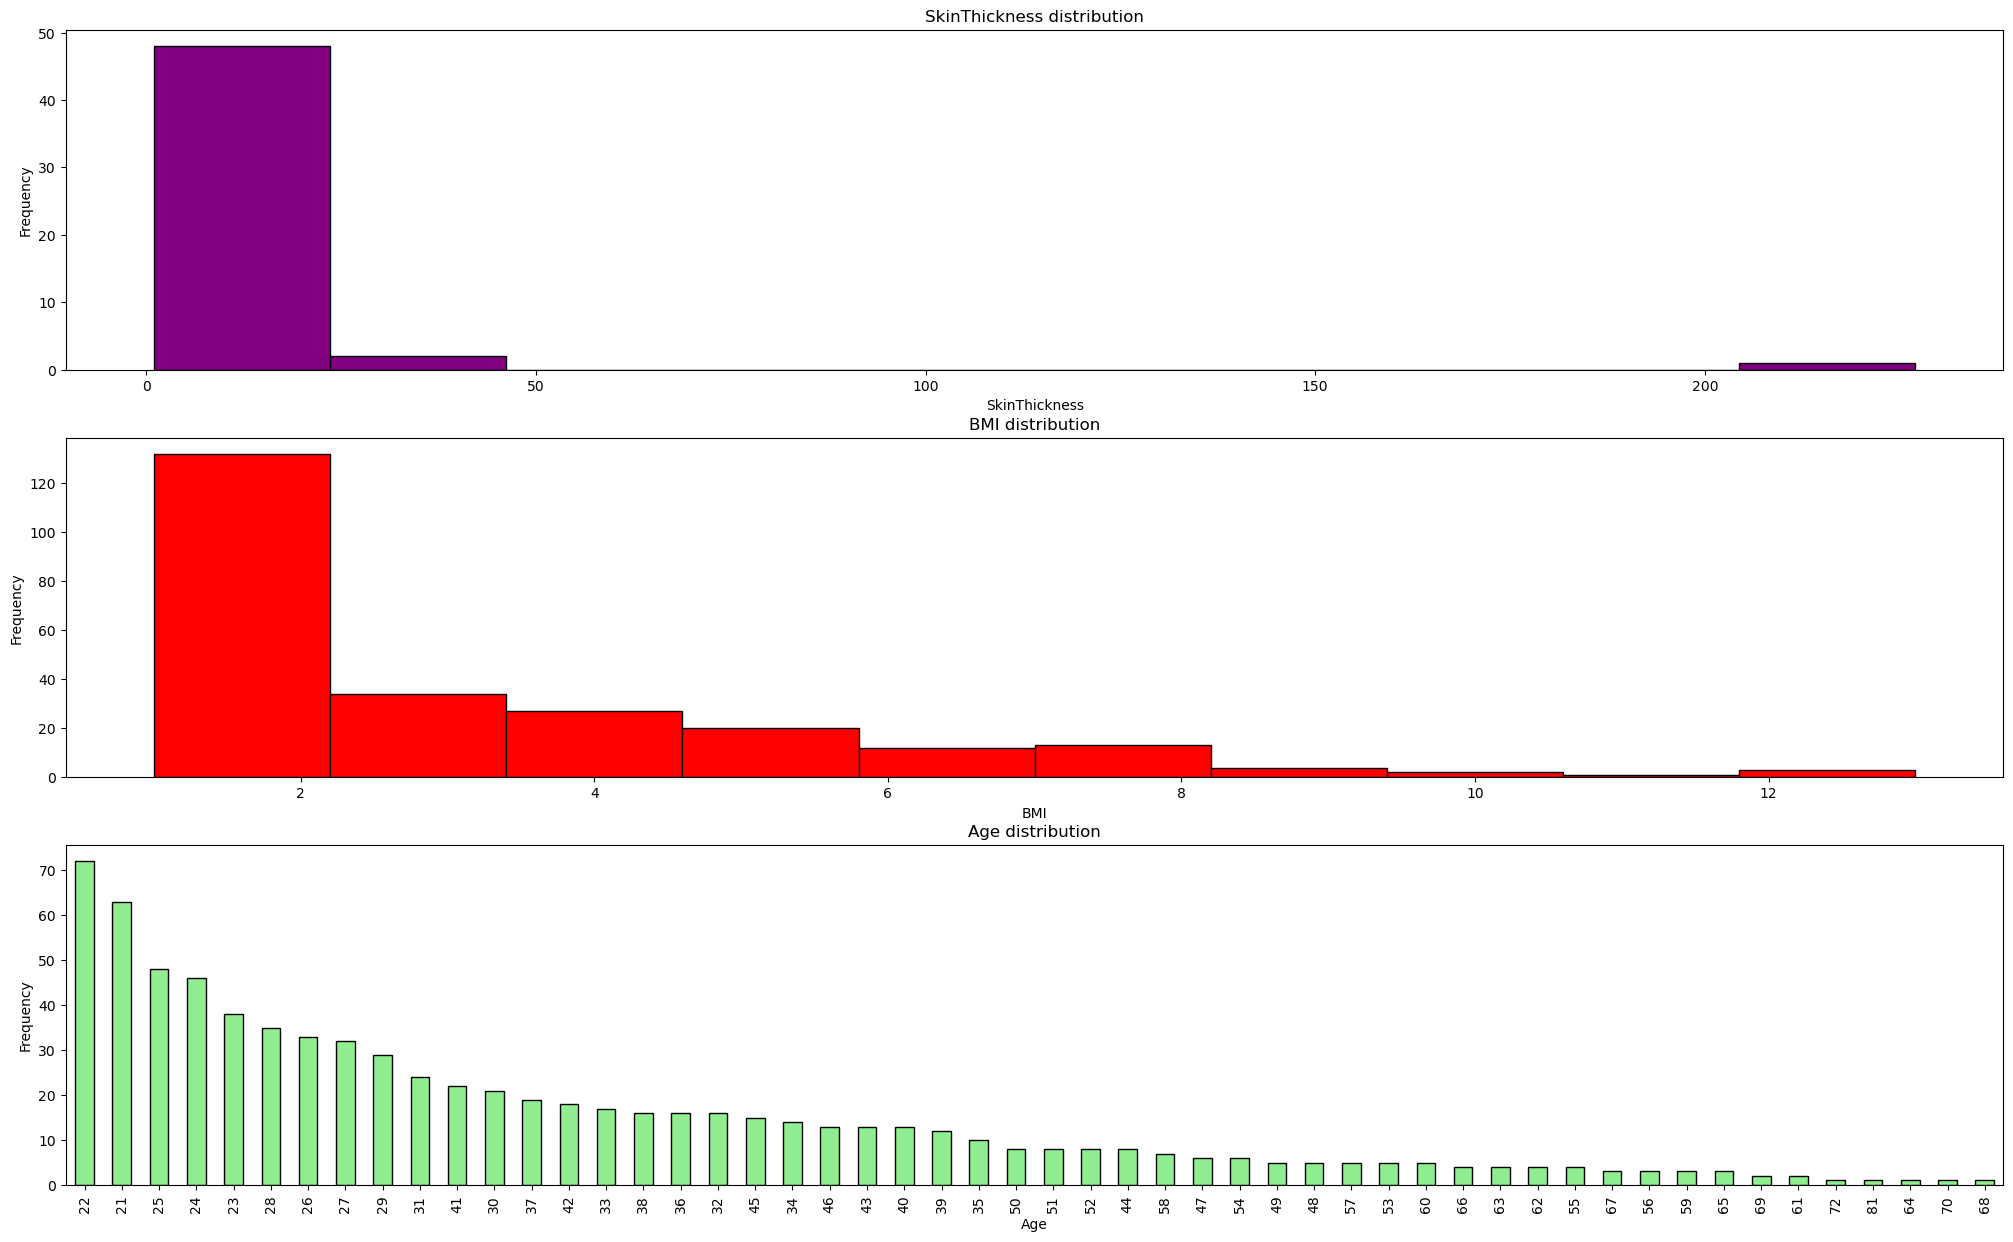

In [121]:

fig, axes = plt.subplots(3,1, figsize=(25, 15))

# Bar plot para "SkinThickness"
df["SkinThickness"].value_counts().plot(kind= "hist", ax=axes[0], color="purple", edgecolor="k")

axes[0].set_title('SkinThickness distribution')
axes[0].set_xlabel('SkinThickness')
axes[0].set_ylabel('Frequency')

# Bar plot para "BMI"
df["BMI"].value_counts().plot(kind= "hist", ax=axes[1], color="red", edgecolor="k")

axes[1].set_title('BMI distribution')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Frequency')

# Bar plot para "Age"
df["Age"].value_counts().plot(kind= "bar", ax=axes[2], color="lightgreen", edgecolor="k")

axes[2].set_title('Age distribution')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Frequency')


- SkinThickness: Podemos observar como unos aprox. 47 pacientes tienen un grosor de piel entre los 5mm y los 25mm.
- BMI: Aprox. unos 135 pacientes tienen el Índice de Masa Corporal (BMI) entre el 0,5 y el 2,1.
- Age: La edad de la mayoría de los pacientes (70 pacientes) se encuentra en los 22 años, seguidos por unos 65 pacientes que tienen 21 años.


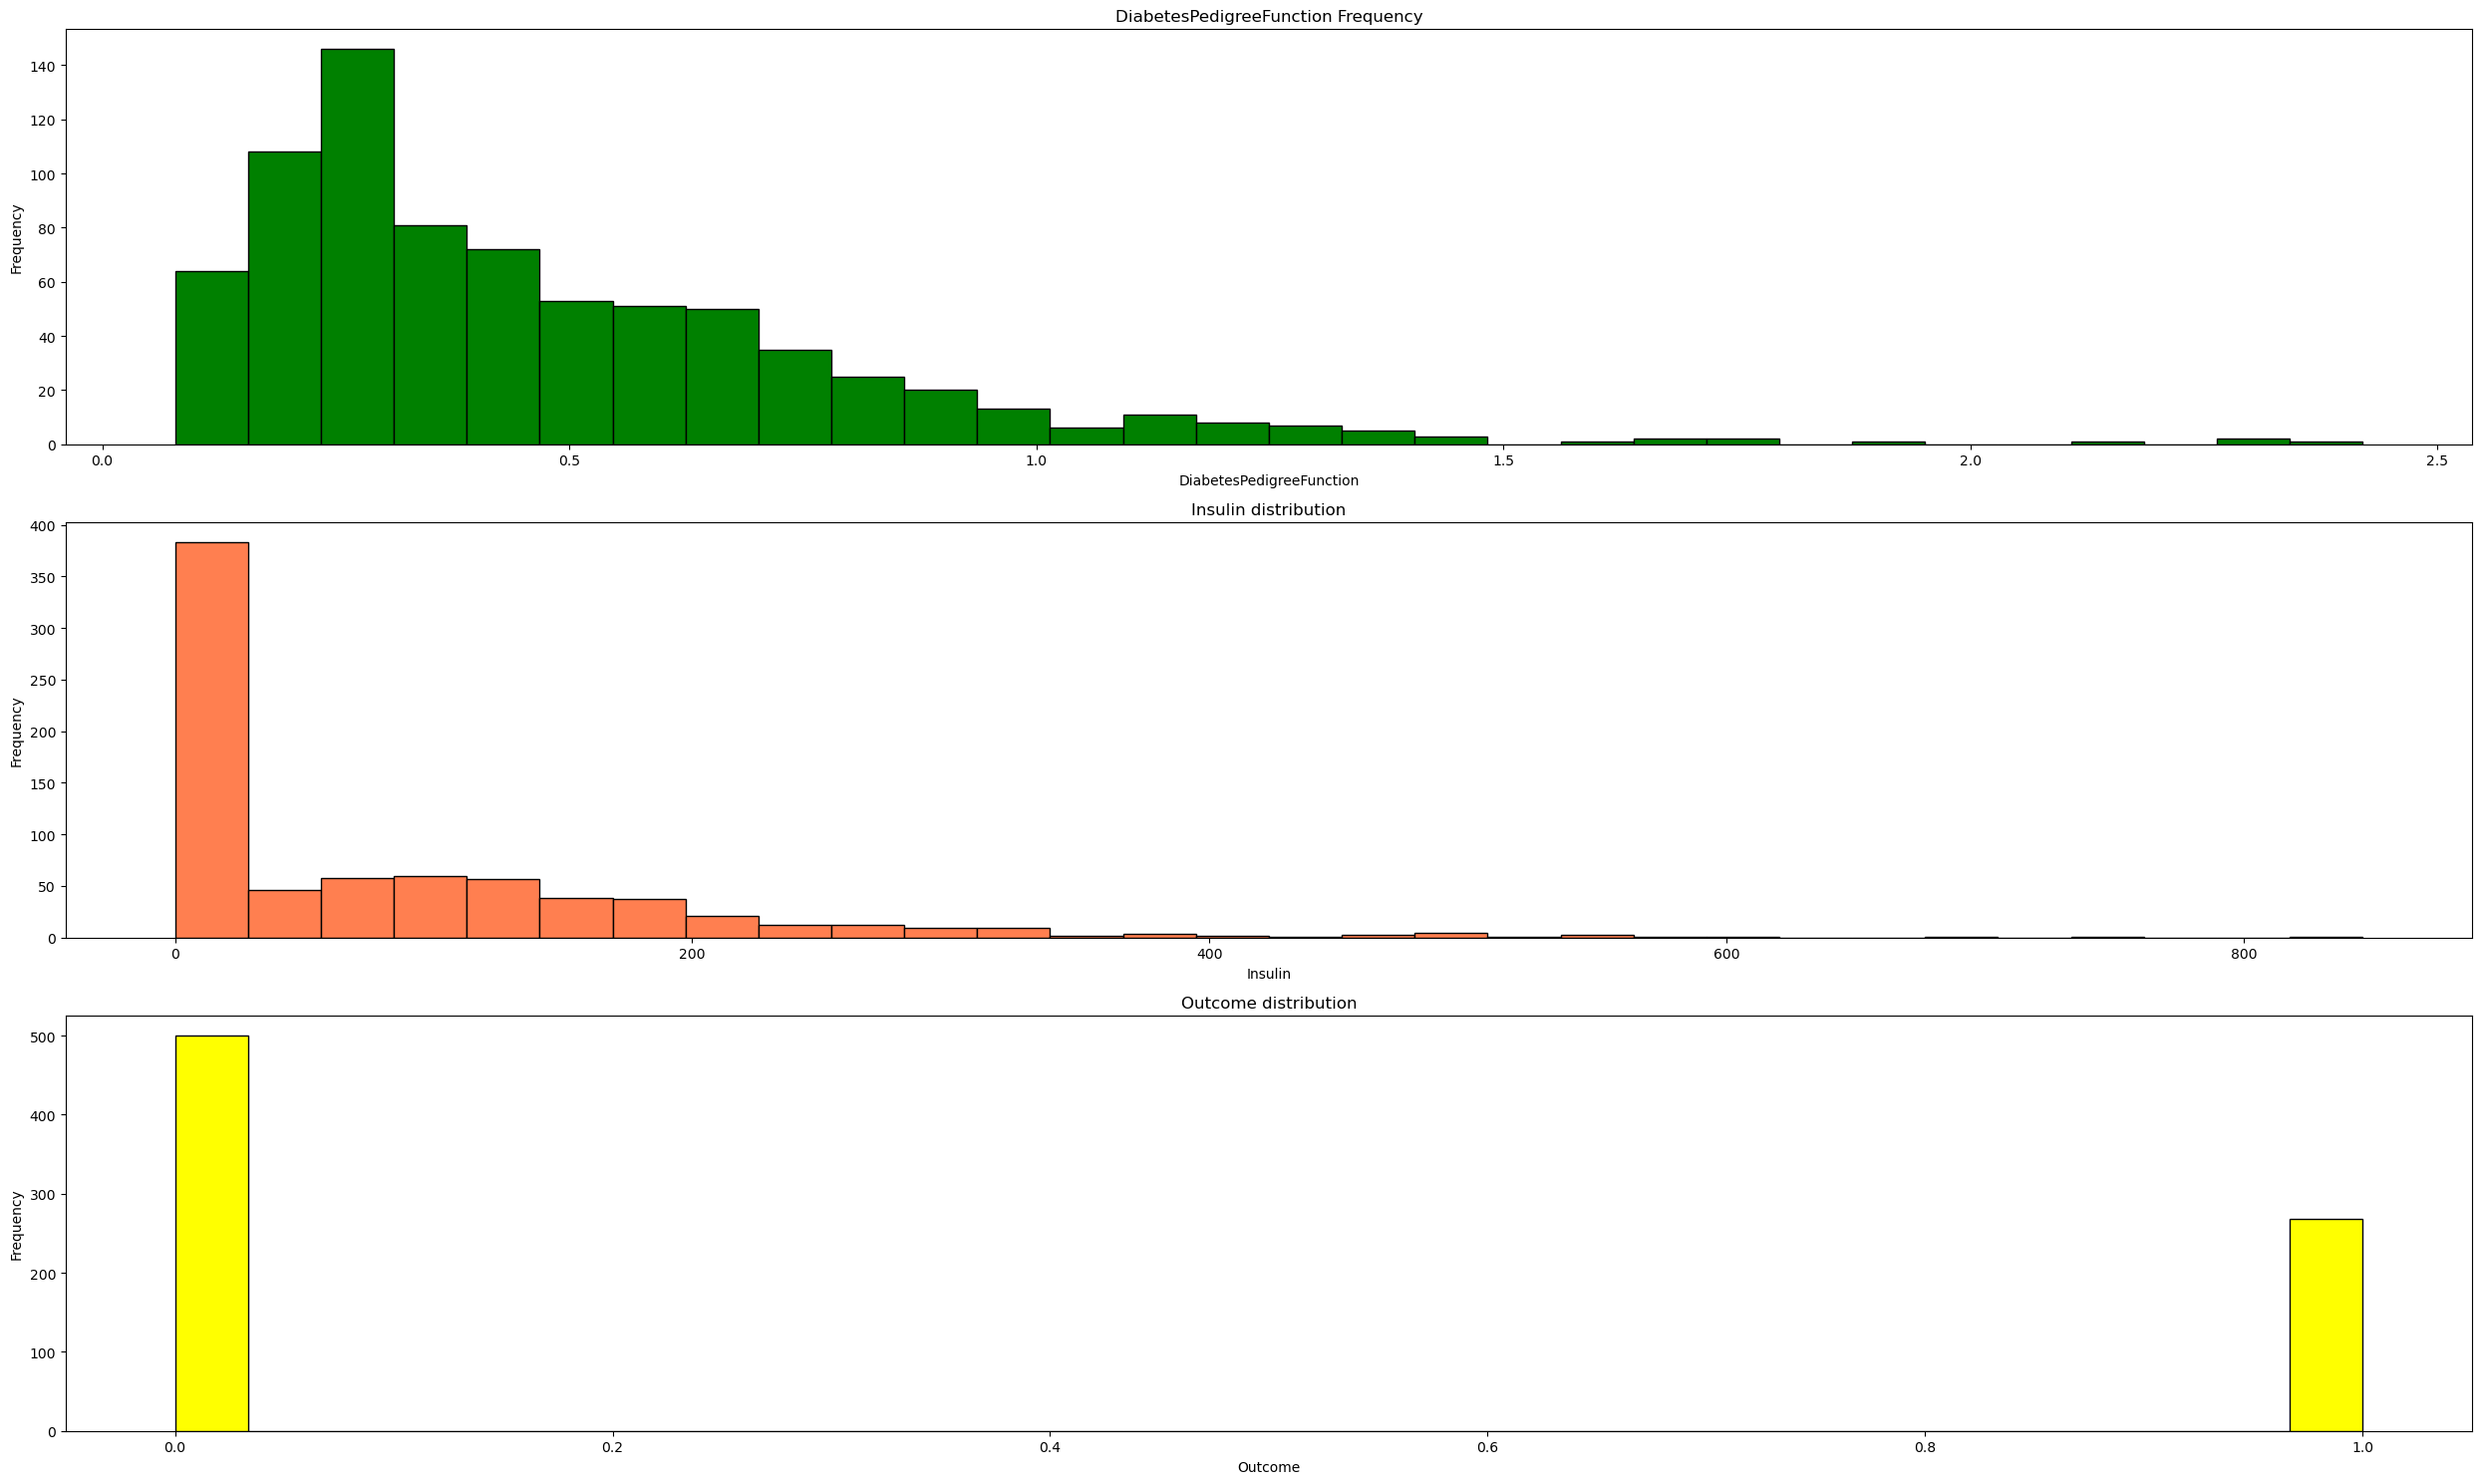

In [122]:

fig, axes = plt.subplots(3,1,figsize=(25,15))

# Histograma para "DiabetesPedigreeFunction"
axes[0].hist(df["DiabetesPedigreeFunction"], bins=30, color="green", edgecolor="k")

axes[0].set_title('DiabetesPedigreeFunction Frequency')
axes[0].set_xlabel('DiabetesPedigreeFunction')
axes[0].set_ylabel('Frequency')

# Histograma para "Insulin"
axes[1].hist(df["Insulin"], bins=30, color="coral", edgecolor="k")

axes[1].set_title('Insulin distribution')
axes[1].set_xlabel('Insulin')
axes[1].set_ylabel('Frequency')

# Histograma para "Outcome"
axes[2].hist(df["Outcome"], bins=30, color="yellow", edgecolor="k")

axes[2].set_title('Outcome distribution')
axes[2].set_xlabel('Outcome')
axes[2].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

Finalmente, para concluir estas dos gráficas, el tipo de diabetes más común sería la que se encuentra entre 0 - 0,5 (aprox. 0,2) ya que más de 140 pacientes presentan este resultado.

Unos aprox. 380 pacientes presentan un grado de Insulina entre el 0-30.

Así que en resumen, la mayoría de pacientes no presentan una patología notable en cuanto al grado de diabetes e insulina representado en estas gráficas.

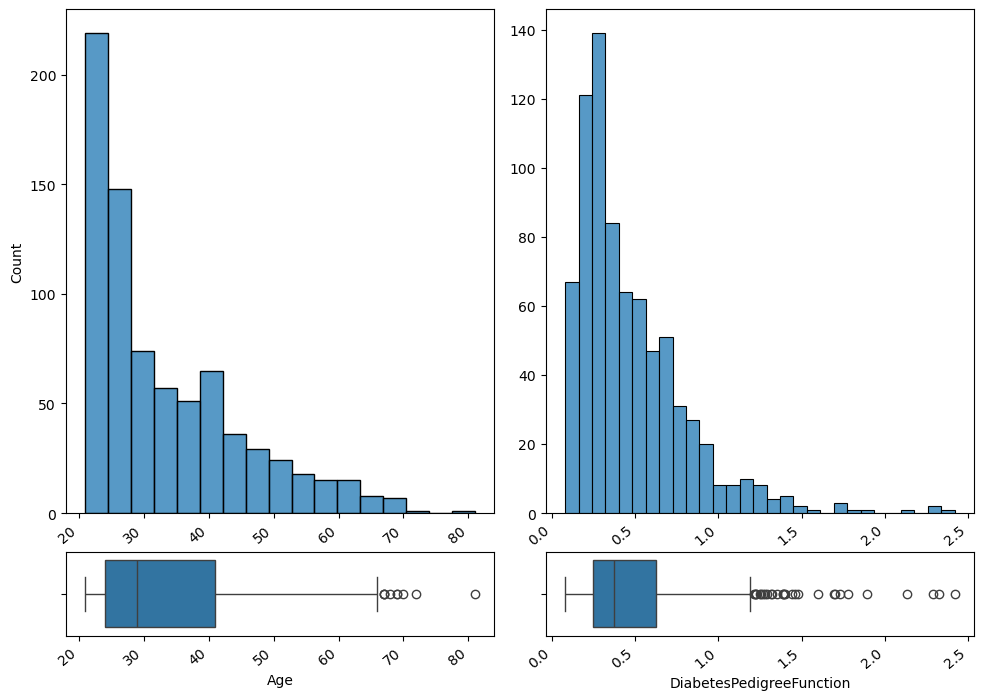

In [123]:
# Vamos a definir las variantes de BMI con DiabetesPedigreeFunction:

fig, axes = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axes[0, 0], data = df, x = "Age").set(xlabel = None)
sns.boxplot(ax = axes[1, 0], data = df, x = "Age")
sns.histplot(ax = axes[0, 1], data = df, x = "DiabetesPedigreeFunction").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axes[1, 1], data = df, x = "DiabetesPedigreeFunction")

# Ajustar el layout
plt.tight_layout()

for ax in axes.flat:
    plt.sca(ax)
    plt.xticks(rotation=40,ha="right")
    
# Mostrar el plot
plt.show()

Comparando las variables de Edad-Diabetes, vemos como la gran mayoría de pacientes que tienen un grado muy ínfimo o, directamente, no tienen, son los que se sitúan entre los 20 y 30 años de edad.
En su mayoría el resultado de diabetes se sitúa entre el 0,2 y el 0,7, la media del cuál se encuentra en 0,4.
Así que son resultados muy bajos como para presentar grabes problemas con la enfermedad.

VALORES ATÍPICOS (OUTLIERS)

In [124]:
# Vamos a ver cuáles son nuestros outliers para que nuestro dataset quede lo más limpio posible.

#El análisis descriptivo es una poderosa herramienta para caracterizar el conjunto de datos:

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


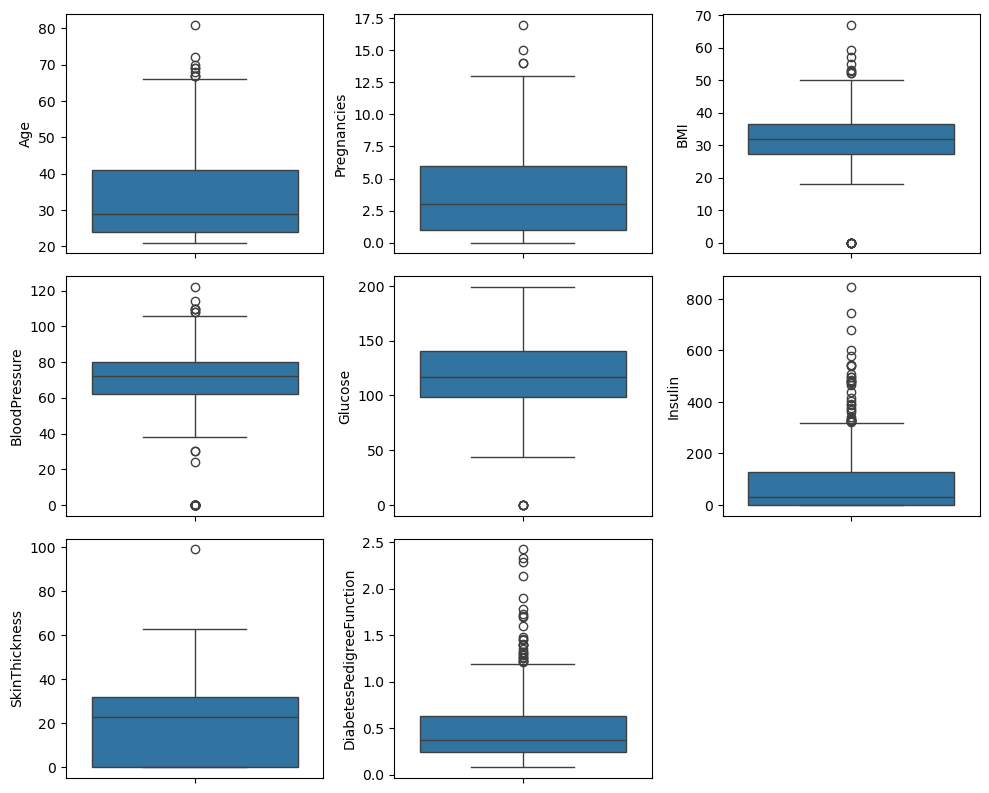

In [125]:
#Dibujar los diagramas de cajas de las variables nos da información poderosa para ver los valores atípicos:

fig, axis = plt.subplots(3,3, figsize = (10, 8))

sns.boxplot(ax = axis[0, 0], data = df, y = "Age")
sns.boxplot(ax = axis[0, 1], data = df, y = "Pregnancies")
sns.boxplot(ax = axis[0, 2], data = df, y = "BMI")
sns.boxplot(ax = axis[1, 0], data = df, y = "BloodPressure")
sns.boxplot(ax = axis[1, 1], data = df, y = "Glucose")
sns.boxplot(ax = axis[1, 2], data = df, y = "Insulin")
sns.boxplot(ax = axis[2, 0], data = df, y = "SkinThickness")
sns.boxplot(ax = axis[2, 1], data = df, y = "DiabetesPedigreeFunction")


fig.delaxes(axis[2, 2])
plt.tight_layout()

plt.show()

Interpretación boxplot box:
Cuadro: representa el rango intercuartil (IQR), donde se encuentra el 50% medio de los valores RMSE. La línea dentro del cuadro muestra la mediana RMSE.
Whiskers: Extender a los valores mínimo y máximo dentro de 1,5 * RIQ de los cuartiles.
Valor atípico: cualquier punto fuera de los "whiskers" se considera un valor atípico. En este gráfico, hay un valor atípico que indica que un pliegue tenía un RMSE 

Vamos a ver qué valores faltantes o nulos tenemos en nuestro Dataset:

In [126]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Como vemos que está limpio, pasamos a escalar nuestros datos

ESCALADO

In [127]:
num_variables=["Insulin","Pregnancies","Age", "BloodPressure", "SkinThickness","Glucose","DiabetesPedigreeFunction","BMI", "Outcome"]
df_encoded=df.copy()

In [128]:
#Vamos primero a escalar y luego modelamos.
#-Escalado:

# instancio el escalador
scaler = StandardScaler()

#Entreno y aplico el escalador
df_encoded[num_variables] = scaler.fit_transform(df_encoded[num_variables]) # type: ignore
df_encoded.head() # type: ignore

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896


MODELAMOS CON DESICION TREE

In [129]:
# Dividimos el conjunto de datos en muestras de train y test

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

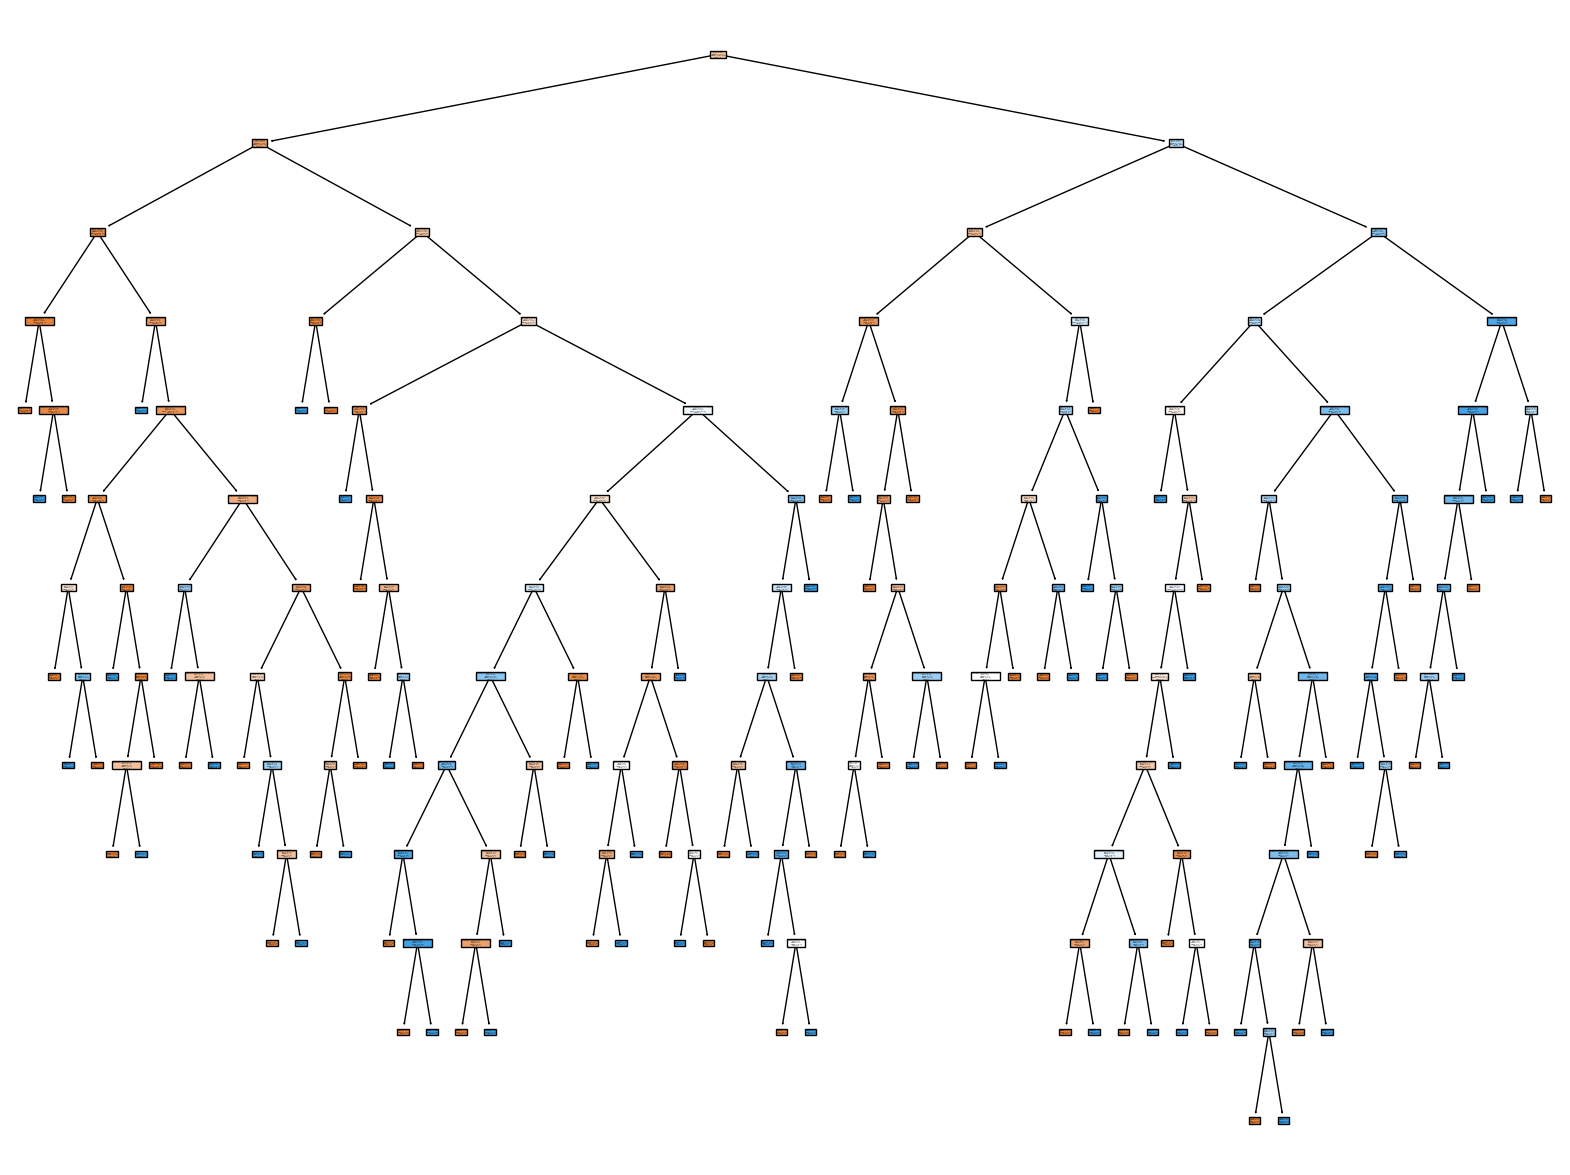

In [130]:
#Building and training - DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

fig = plt.figure(figsize=(20,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [131]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [132]:
# Train metrics
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)
accuracy = accuracy_score(y_train, y_pred_train)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


In [133]:
# Test metrics
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')
accuracy = accuracy_score(y_test, y_pred_test)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Accuracy: 0.76
Precision: 0.77
Recall: 0.76
F1-Score: 0.76


In [134]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[77 22]
 [15 40]]


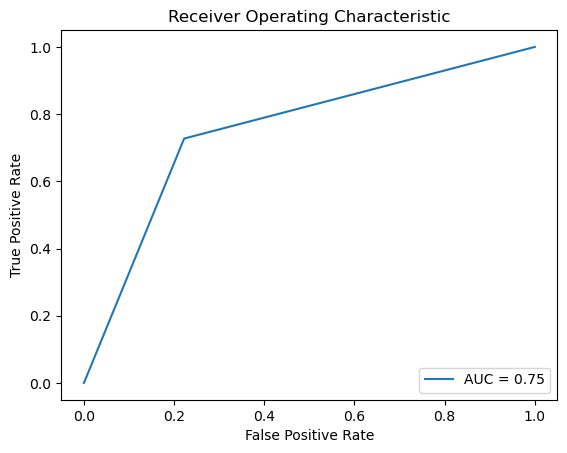

In [135]:
# Clasificación binaria
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Nuestro modelo presenta Overfitting, vamos a optimizarlo para que esto no ocurra.

In [136]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [137]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy:.2f}')
print(f'AUC: {auc:.2f}')

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.76
AUC: 0.79


Esto se debe al sobreajuste que encontramos anteriormente, ya que solo permite que el modelo alcance cierta profundidad para evitarlo.

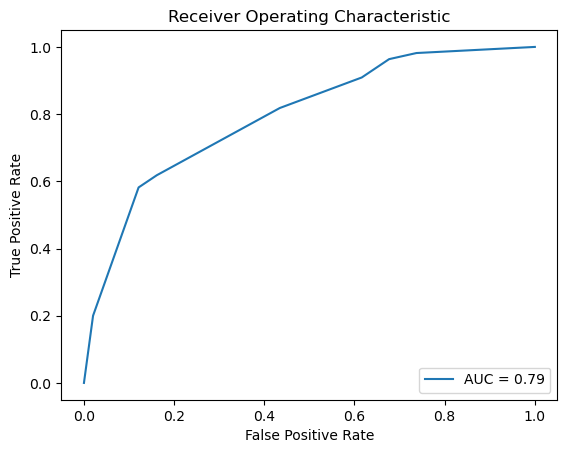

In [138]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

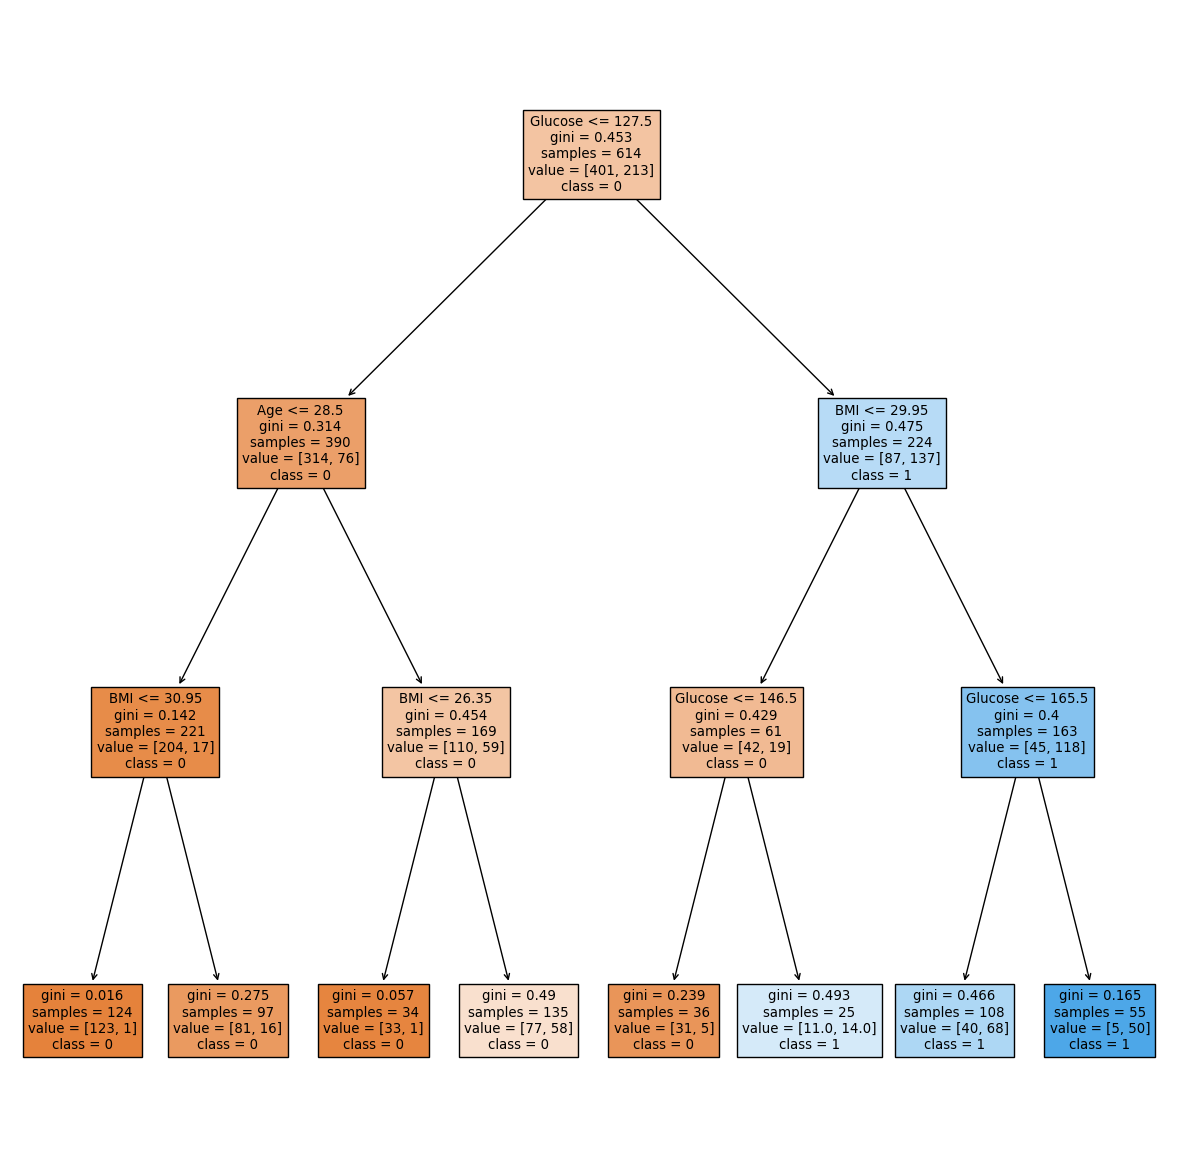

In [140]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(best_model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()